In [ ]:
import zipfile
import os

# Path to the zip file and extraction directory
zip_path = './360 Rocks.zip'
extract_to = './Rock_Dataset'

# Create the directory if it doesn't exist
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Unzip the dataset into the new directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Assuming the images are directly in the 'Rock_Dataset' directory after extraction
image_folder = extract_to
image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith('.jpg')]

# Now you can load an image
from PIL import Image
image = Image.open(image_files[0])
image.show()

### Question -1

In [ ]:
import os
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'Rock_Dataset' is your directory with images
image_folder = './Rock_Dataset'
image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg')]
images = [Image.open(img_path).convert('L') for img_path in image_paths]  # Convert images to grayscale
images_resized = [img.resize((128, 128)) for img in images]  # Resize for uniformity, if necessary

# Flatten the images
image_arrays = np.array([np.array(img).flatten() for img in images_resized])

# Standardize the data
scaler = StandardScaler()
image_arrays_standardized = scaler.fit_transform(image_arrays)

# Apply PCA
pca = PCA(n_components=0.95)  # Configure PCA to preserve 95% of the variance
pca.fit(image_arrays_standardized)

# Number of components to preserve 95% of the variance
n_components = pca.n_components_

print(f"Number of components to preserve 95% of the variance: {n_components}")

Number of components to preserve 95% of the variance: 189


In [ ]:
images_resized

[<PIL.Image.Image image mode=L size=128x128 at 0x1DF502A40B8>,
 <PIL.Image.Image image mode=L size=128x128 at 0x1DF6123BE80>,
 <PIL.Image.Image image mode=L size=128x128 at 0x1DF6123BF98>,
 <PIL.Image.Image image mode=L size=128x128 at 0x1DF6123BF28>,
 <PIL.Image.Image image mode=L size=128x128 at 0x1DF6123BFD0>,
 <PIL.Image.Image image mode=L size=128x128 at 0x1DF6124D0F0>,
 <PIL.Image.Image image mode=L size=128x128 at 0x1DF6124D160>,
 <PIL.Image.Image image mode=L size=128x128 at 0x1DF6124D198>,
 <PIL.Image.Image image mode=L size=128x128 at 0x1DF6124D1D0>,
 <PIL.Image.Image image mode=L size=128x128 at 0x1DF6124D128>,
 <PIL.Image.Image image mode=L size=128x128 at 0x1DF6124D208>,
 <PIL.Image.Image image mode=L size=128x128 at 0x1DF6124D240>,
 <PIL.Image.Image image mode=L size=128x128 at 0x1DF6124D278>,
 <PIL.Image.Image image mode=L size=128x128 at 0x1DF6124D2B0>,
 <PIL.Image.Image image mode=L size=128x128 at 0x1DF6124D2E8>,
 <PIL.Image.Image image mode=L size=128x128 at 0x1DF612

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fit PCA on the image data
pca = PCA(n_components=0.95)  # Configure PCA to preserve 95% of the variance
pca = PCA().fit(image_arrays_standardized)

# Calculate the cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the index where the cumulative variance exceeds 0.95
# and add 1 to get the number of components
n_components_95 = np.where(cumulative_variance > 0.95)[0][0] + 1

# Plot the explained variances
sns.set(style='whitegrid')
plt.figure(figsize=(10, 7))
plt.plot(cumulative_variance, lw=3)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components_95, color='r', linestyle='--')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.title('PCA Cumulative Explained Variance')
plt.show()

print(f"Number of components to preserve 95% of the variance: {n_components_95}")


<Figure size 1000x700 with 1 Axes>

Number of components to preserve 95% of the variance: 189


<b> <i>  This clearly shows that 189 Components are required to preserve 95% of the cumulative explained variance. The horizontal red dashed line marks the 95% threshold, and the vertical red dashed line indicates the number of components required to reach at least 95% cumulative variance.


### Question -2

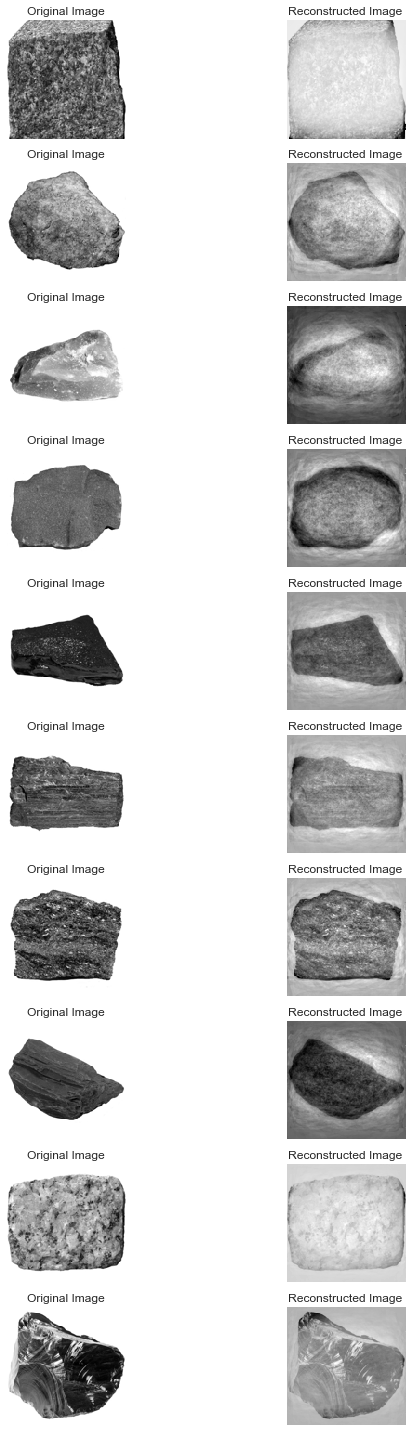

In [ ]:
import matplotlib.pyplot as plt
import random

# Select 10 random images from the dataset
selected_indices = random.sample(range(len(images_resized)), 10)
selected_images = [images_resized[i] for i in selected_indices]
selected_images_arrays = image_arrays_standardized[selected_indices]

# Apply PCA to reduce the images to the components that preserve 95% of variance
pca = PCA(n_components=0.95)
pca.fit(image_arrays_standardized)
transformed_images = pca.transform(selected_images_arrays)

# Inverse transform to reconstruct the images from the PCA space
reconstructed_images = pca.inverse_transform(transformed_images)

# Plot the original and reconstructed images
fig, axes = plt.subplots(10, 2, figsize=(10, 20))

for i, (original, reconstructed) in enumerate(zip(selected_images, reconstructed_images)):
    # Original image
    axes[i, 0].imshow(np.array(original), cmap='gray')
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')

    # Reconstructed image
    reconstructed = reconstructed.reshape(128, 128)  # Assuming the original size is 128x128
    axes[i, 1].imshow(reconstructed, cmap='gray')
    axes[i, 1].set_title('Reconstructed Image')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter

# Assuming 'image_paths' is a list of file paths for the images
categories = [os.path.basename(path)[0] for path in image_paths]  # Get the first letter of each filename
category_counts = Counter(categories)  # Count occurrences of each category

# Print the counts for each category
for category, count in category_counts.items():
    print(f"Category {category}: {count} images")


Category I: 120 images
Category M: 120 images
Category S: 120 images


### Question- 3 A

In [ ]:
# Apply PCA and reduce the images to 2 components
pca_2d = PCA(n_components=2)
pca_2d.fit(image_arrays_standardized)

# The explained variance ratio for the first two components
explained_variance = pca_2d.explained_variance_ratio_
total_explained_variance = sum(explained_variance)

print(f"Explained variance by the first component: {explained_variance[0]:.2%}")
print(f"Explained variance by the second component: {explained_variance[1]:.2%}")
print(f"Total explained variance by the first two components: {total_explained_variance:.2%}")

Explained variance by the first component: 20.48%
Explained variance by the second component: 13.40%
Total explained variance by the first two components: 33.88%


## PCA

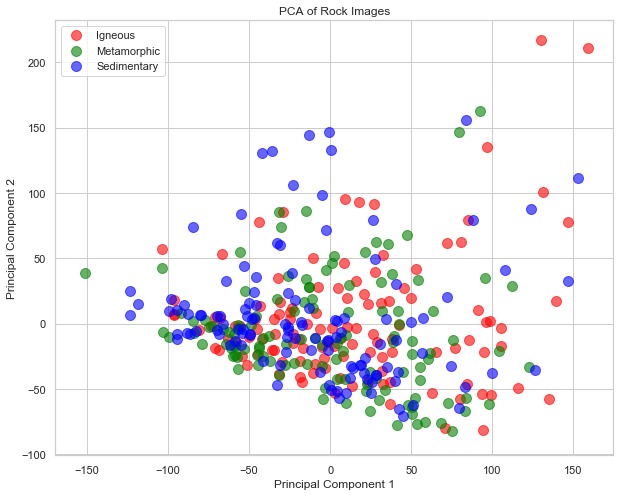

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.decomposition import PCA
import numpy as np
import os

# Assuming 'image_arrays_standardized' and 'image_paths' are already defined
# Apply PCA to the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(image_arrays_standardized)

# Create a mapping of category to color with full names for the legend
category_colors = {'I': 'red', 'M': 'green', 'S': 'blue'}
category_names = {'I': 'Igneous', 'M': 'Metamorphic', 'S': 'Sedimentary'}

# Scatter plot of the first two PCA components
plt.figure(figsize=(10, 8))
for category, color in category_colors.items():
    subset = X_pca[np.array(categories) == category]
    plt.scatter(subset[:, 0], subset[:, 1], s=100, alpha=0.6, label=category_names[category], color=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Rock Images')
plt.legend()
plt.show()

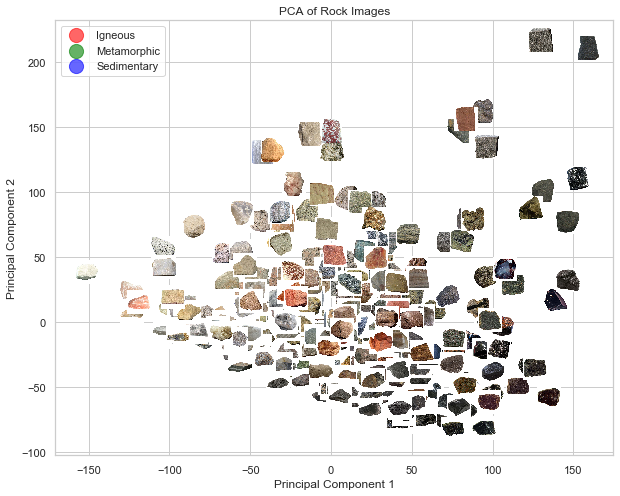

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.decomposition import PCA
import numpy as np
import os

# Assuming 'image_arrays_standardized' and 'image_paths' are already defined
# Apply PCA to the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(image_arrays_standardized)

# Create a mapping of category to color with full names for the legend
category_colors = {'I': 'red', 'M': 'green', 'S': 'blue'}
category_names = {'I': 'Igneous', 'M': 'Metamorphic', 'S': 'Sedimentary'}

# Scatter plot of the first two PCA components
plt.figure(figsize=(10, 8))
for category, color in category_colors.items():
    subset = X_pca[np.array(categories) == category]
    plt.scatter(subset[:, 0], subset[:, 1], s=200, alpha=0.6, label=category_names[category], color=color)

# Optionally, add image thumbnails to the scatter plot
for i, image_path in enumerate(image_paths):
    category = os.path.basename(image_path)[0]
    image = plt.imread(image_path)
    imagebox = OffsetImage(image, zoom=0.03)  # Adjust zoom as needed
    ab = AnnotationBbox(imagebox, (X_pca[i, 0], X_pca[i, 1]), frameon=False)
    plt.gca().add_artist(ab)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Rock Images')
plt.legend()
plt.show()

### Question-3 B

In [ ]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS

# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(image_arrays_standardized)

# LLE
lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(image_arrays_standardized)

# MDS
mds = MDS(n_components=2)
X_mds = mds.fit_transform(image_arrays_standardized)

# Now, you can create plots for each of the techniques as done with PCA
# Replace 'X_pca' with 'X_tsne', 'X_lle', or 'X_mds' in the plotting code

## TSNE

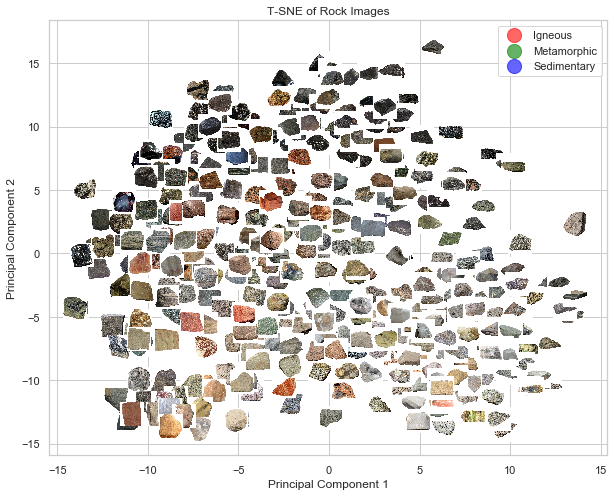

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.decomposition import PCA
import numpy as np
import os

# Assuming 'image_arrays_standardized' and 'image_paths' are already defined
# Create a mapping of category to color with full names for the legend
category_colors = {'I': 'red', 'M': 'green', 'S': 'blue'}
category_names = {'I': 'Igneous', 'M': 'Metamorphic', 'S': 'Sedimentary'}

# Scatter plot of the first two PCA components
plt.figure(figsize=(10, 8))
for category, color in category_colors.items():
    subset = X_tsne[np.array(categories) == category]
    plt.scatter(subset[:, 0], subset[:, 1], s=200, alpha=0.6, label=category_names[category], color=color)

# Optionally, add image thumbnails to the scatter plot
for i, image_path in enumerate(image_paths):
    category = os.path.basename(image_path)[0]
    image = plt.imread(image_path)
    imagebox = OffsetImage(image, zoom=0.03)  # Adjust zoom as needed
    ab = AnnotationBbox(imagebox, (X_tsne[i, 0], X_tsne[i, 1]), frameon=False)
    plt.gca().add_artist(ab)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('T-SNE of Rock Images')
plt.legend()
plt.show()

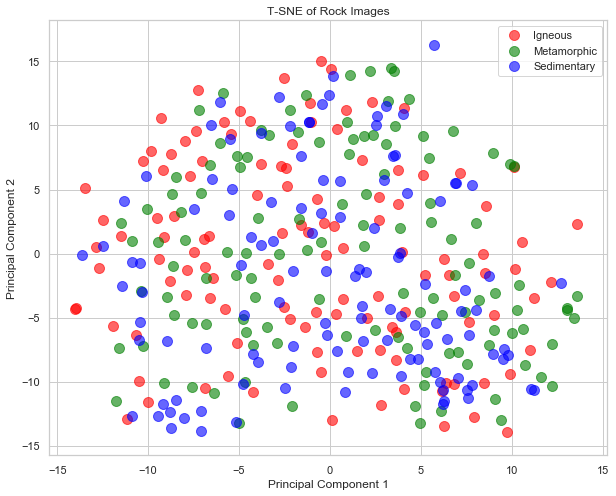

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.decomposition import PCA
import numpy as np
import os

# Assuming 'image_arrays_standardized' and 'image_paths' are already defined
# Create a mapping of category to color with full names for the legend
category_colors = {'I': 'red', 'M': 'green', 'S': 'blue'}
category_names = {'I': 'Igneous', 'M': 'Metamorphic', 'S': 'Sedimentary'}

# Scatter plot of the first two PCA components
plt.figure(figsize=(10, 8))
for category, color in category_colors.items():
    subset = X_tsne[np.array(categories) == category]
    plt.scatter(subset[:, 0], subset[:, 1], s=100, alpha=0.6, label=category_names[category], color=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('T-SNE of Rock Images')
plt.legend()
plt.show()

## LLE

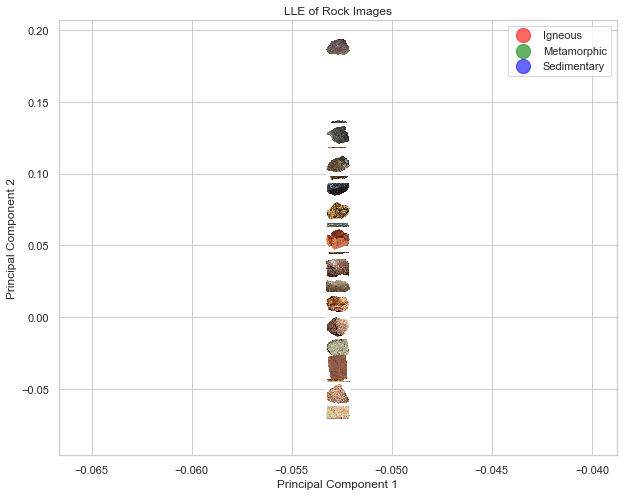

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.decomposition import PCA
import numpy as np
import os

# Assuming 'image_arrays_standardized' and 'image_paths' are already defined
# Create a mapping of category to color with full names for the legend
category_colors = {'I': 'red', 'M': 'green', 'S': 'blue'}
category_names = {'I': 'Igneous', 'M': 'Metamorphic', 'S': 'Sedimentary'}

# Scatter plot of the first two PCA components
plt.figure(figsize=(10, 8))
for category, color in category_colors.items():
    subset = X_lle[np.array(categories) == category]
    plt.scatter(subset[:, 0], subset[:, 1], s=200, alpha=0.6, label=category_names[category], color=color)

# Optionally, add image thumbnails to the scatter plot
for i, image_path in enumerate(image_paths):
    category = os.path.basename(image_path)[0]
    image = plt.imread(image_path)
    imagebox = OffsetImage(image, zoom=0.03)  # Adjust zoom as needed
    ab = AnnotationBbox(imagebox, (X_lle[i, 0], X_lle[i, 1]), frameon=False)
    plt.gca().add_artist(ab)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('LLE of Rock Images')
plt.legend()
plt.show()

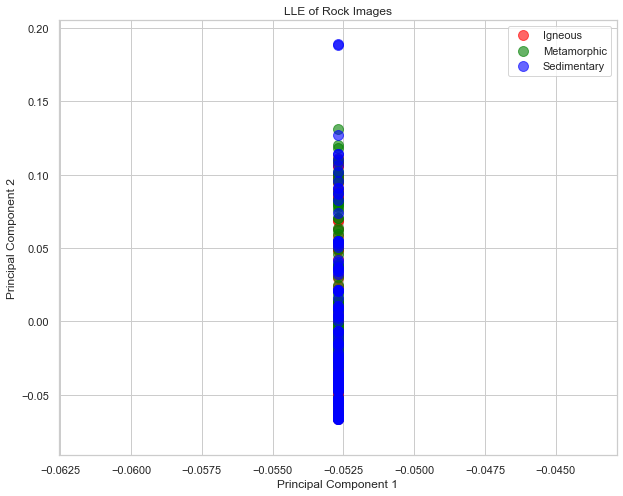

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.decomposition import PCA
import numpy as np
import os

# Assuming 'image_arrays_standardized' and 'image_paths' are already defined
# Create a mapping of category to color with full names for the legend
category_colors = {'I': 'red', 'M': 'green', 'S': 'blue'}
category_names = {'I': 'Igneous', 'M': 'Metamorphic', 'S': 'Sedimentary'}

# Scatter plot of the first two PCA components
plt.figure(figsize=(10, 8))
for category, color in category_colors.items():
    subset = X_lle[np.array(categories) == category]
    plt.scatter(subset[:, 0], subset[:, 1], s=100, alpha=0.6, label=category_names[category], color=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('LLE of Rock Images')
plt.legend()
plt.show()

## MDS

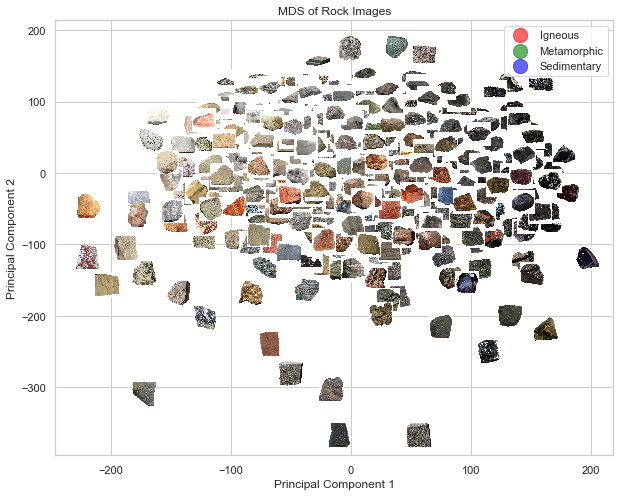

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.decomposition import PCA
import numpy as np
import os

# Assuming 'image_arrays_standardized' and 'image_paths' are already defined
# Create a mapping of category to color with full names for the legend
category_colors = {'I': 'red', 'M': 'green', 'S': 'blue'}
category_names = {'I': 'Igneous', 'M': 'Metamorphic', 'S': 'Sedimentary'}

# Scatter plot of the first two PCA components
plt.figure(figsize=(10, 8))
for category, color in category_colors.items():
    subset = X_mds[np.array(categories) == category]
    plt.scatter(subset[:, 0], subset[:, 1], s=200, alpha=0.6, label=category_names[category], color=color)

# Optionally, add image thumbnails to the scatter plot
for i, image_path in enumerate(image_paths):
    category = os.path.basename(image_path)[0]
    image = plt.imread(image_path)
    imagebox = OffsetImage(image, zoom=0.03)  # Adjust zoom as needed
    ab = AnnotationBbox(imagebox, (X_mds[i, 0], X_mds[i, 1]), frameon=False)
    plt.gca().add_artist(ab)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MDS of Rock Images')
plt.legend()
plt.show()

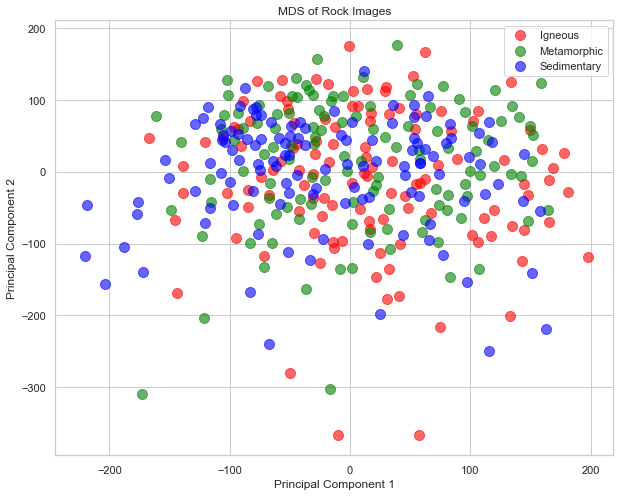

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.decomposition import PCA
import numpy as np
import os

# Assuming 'image_arrays_standardized' and 'image_paths' are already defined
# Create a mapping of category to color with full names for the legend
category_colors = {'I': 'red', 'M': 'green', 'S': 'blue'}
category_names = {'I': 'Igneous', 'M': 'Metamorphic', 'S': 'Sedimentary'}

# Scatter plot of the first two PCA components
plt.figure(figsize=(10, 8))
for category, color in category_colors.items():
    subset = X_mds[np.array(categories) == category]
    plt.scatter(subset[:, 0], subset[:, 1], s=100, alpha=0.6, label=category_names[category], color=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MDS of Rock Images')
plt.legend()
plt.show()

### Question 3-C

Based on the provided visualizations from PCA, LLE, t-SNE, and MDS algorithms, each plot offers a different perspective on the dataset:

PCA (Principal Component Analysis): PCA tends to preserve global distances between points and is good at highlighting large-scale structure in the data. However, it may not always capture the local structure as effectively, which can be essential for classifying similar objects, like rock images.

LLE (Locally Linear Embedding): LLE is more focused on preserving local distances, and therefore, it might be better at clustering local groups of data points. In your LLE plot, the categories seem to be slightly more clustered than in PCA, but there is still some overlap.

t-SNE (t-Distributed Stochastic Neighbor Embedding): t-SNE is particularly good at preserving local structure and is known for its ability to separate clusters in a more distinct manner. The t-SNE plot shows separated clusters, but some overlap remains.

MDS (Multidimensional Scaling): MDS aims to preserve the distance between points, similar to PCA, but it uses a slightly different approach. It is more focused on visualizing the similarity of individual cases in a dataset.

From a classification perspective, the algorithm that results in the best-separated clusters of points, corresponding to the different rock types, would be the most useful. Based on the scatter plots alone and without additional quantitative analysis, t-SNE seems to provide the most distinct separation among the three rock categories. However, the effectiveness of each method can vary with different datasets and hyperparameter settings, so it is often recommended to evaluate the classification performance with actual supervised learning algorithms to determine the best method for the specific task.

The t-SNE visualization is often considered the best among the dimensionality reduction techniques for classifying complex datasets with non-linear structures because:

t-SNE is adept at creating a two-dimensional map that reveals the intrinsic structure of the data at many different scales, which is often very effective for visualizing high-dimensional data.
It excels at maintaining the local structure of the data, meaning that points which are close in the high-dimensional space will likely be close in the 2D map as well.
t-SNE tends to expand dense clusters and contract sparse ones, allowing for clearer visual separation if such clusters exist in the data.
In the context of your dataset, the t-SNE plot appears to show clearer separation between different rock categories than PCA, LLE, and MDS. This suggests that the local structures within your data are quite distinct, and t-SNE is effectively bringing those to light, which can be especially useful for classification tasks.

### Question-4

In [ ]:
# First, let's load the human features data from 'mds_360.txt'
import pandas as pd

# Load the data
human_features_path = './mds_360.txt'
# It seems the data is not tab-separated as initially thought.
# Let's try to load it by considering any amount of whitespace as a separator.
human_features = pd.read_csv(human_features_path, header=None, delim_whitespace=True)

# Check the reloaded data and its shape to confirm it's correctly formatted as 360 by 8.
human_features.shape, human_features.head()

((360, 8),        0      1      2      3      4      5      6      7
 0 -3.743 -1.204  2.001  0.164 -0.077 -1.992  4.950  1.695
 1  2.332  1.625  0.985 -3.223 -1.308  0.093  6.724  0.708
 2  0.346  1.490 -3.795 -1.653  1.083 -3.786  0.706 -2.854
 3  0.320  1.842 -0.352 -3.178 -3.670  0.699  1.499 -0.877
 4 -0.228  5.029  1.033 -3.007  0.749 -3.479 -0.285  0.255)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS

# Your image feature data 'X' should be loaded here

# Apply PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(human_features)

# Apply t-SNE
tsne = TSNE(n_components=8, method='exact')  # method='exact' to ensure reproducibility for small dimensions
X_tsne = tsne.fit_transform(human_features)

# Apply LLE
lle = LocallyLinearEmbedding(n_components=8)
X_lle = lle.fit_transform(human_features)

# Apply MDS
mds = MDS(n_components=8)
X_mds = mds.fit_transform(human_features)

# The resulting variables X_pca, X_tsne, X_lle, and X_mds now contain the 8-dimensional embeddings

In [ ]:
human_features.shape

(360, 8)

In [ ]:
X_pca.shape

(360, 8)

In [ ]:
import numpy as np
from scipy.spatial import procrustes

# Assuming `human_features` is the human feature data loaded previously
# Assuming `X_pca`, `X_tsne`, `X_lle`, `X_mds` are the embeddings obtained from the previous step

# Define a function to perform Procrustes analysis and compute correlations
def analyze_embeddings(human_features, method_embeddings, method_name):
    mtx1, mtx2, disparity = procrustes(human_features, method_embeddings)
    correlations = np.corrcoef(mtx1.T, mtx2.T)[:8, 8:]
    return disparity, correlations

# Prepare a dictionary to store results
results = {}

# Perform the analysis for each method
methods = {'PCA': X_pca, 't-SNE': X_tsne, 'LLE': X_lle, 'MDS': X_mds}
for method_name, embeddings in methods.items():
    disparity, correlations = analyze_embeddings(human_features.values, embeddings, method_name)
    results[method_name] = {
        'Disparity': disparity.round(2),
        'Correlation Coefficients': correlations.round(2)
    }

# Display the results in a table format
# You can use pandas DataFrame for a nicer display
results_df = pd.DataFrame(results)
results_df

,PCA,t-SNE,LLE,MDS
Disparity,0,0.95,0.58,0
Correlation Coefficients,"[[1.0, 0.04, 0.06, -0.16, 0.0, 0.12, -0.02, 0....","[[0.36, -0.02, 0.0, -0.1, -0.01, 0.1, -0.0, -0...","[[0.88, 0.02, 0.07, -0.09, -0.01, 0.08, 0.01, ...","[[1.0, 0.04, 0.06, -0.16, 0.0, 0.12, -0.02, 0...."


### Question 5 A

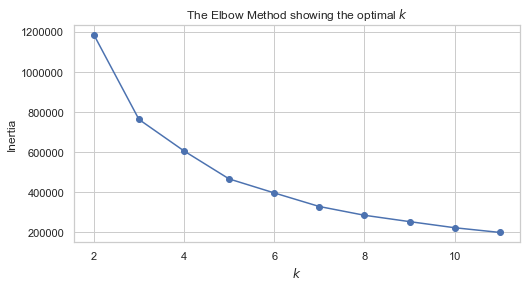

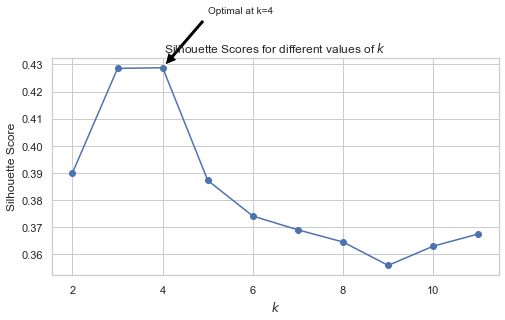

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Assuming 'image_features' is your image feature data

# Step 1: Reduce dimensionality to two with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(image_arrays_standardized)

# Step 2: Determine the optimal number of clusters 'k'
inertia = []
silhouette_scores = []
K_range = range(2, 12)  # Example range, can be adjusted

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_pca)
    inertia.append(kmeans.inertia_)  # Sum of squared distances of samples to their closest cluster center
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Plot the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

# Plot the silhouette scores with annotation
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different values of $k$')

# Find the silhouette score for k=4
k_4_silhouette = silhouette_scores[2]  # Assuming K_range starts from 2

# Add annotation
plt.annotate('Optimal at k=4',
             xy=(4, k_4_silhouette),
             xytext=(5, k_4_silhouette + 0.02),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

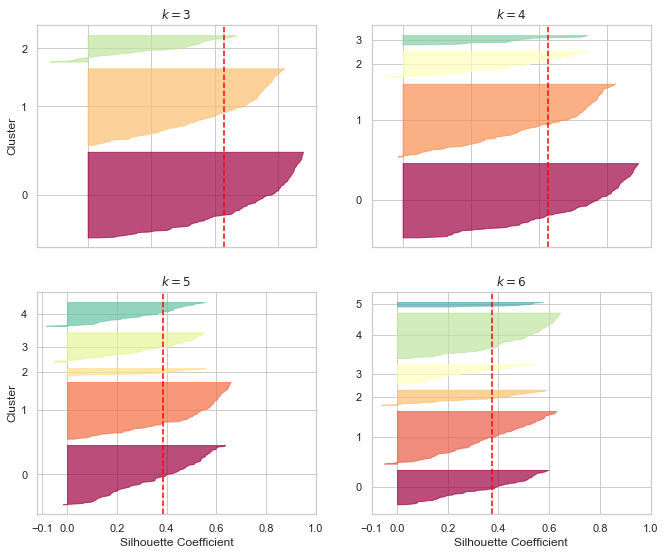

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

# Assuming X_pca is defined and is your dataset reduced to principal components

# Train KMeans for different values of k
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_pca) for k in range(2, 7)]

# Calculate silhouette scores for each k
silhouette_scores = [silhouette_samples(X_pca, model.labels_) for model in kmeans_per_k]

# Plotting the silhouette diagrams
plt.figure(figsize=(11, 9))

for k in range(3, 7):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 2].labels_
    silhouette_coefficients = silhouette_scores[k - 2]

    padding = len(X_pca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=np.mean(silhouette_coefficients), color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

As you can see, k = 4 looks like the best option here, as all clusters are roughly the same size, and they all cross the dashed line, which represents the mean silhouette score

In [ ]:
# Choose the 'k' after examining the elbow plot and silhouette scores

# Step 3: Apply K-Means clustering with the chosen number of clusters
optimal_k = 4  # Replace with the chosen k after the analysis
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42).fit(X_pca)

In [ ]:
cluster_labels = kmeans_final.fit_predict(X_pca)

In [ ]:
cluster_labels

array([1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 2, 3, 3, 1, 1, 3, 1, 1,
       0, 1, 3, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 1, 2, 1, 1,
       1, 1, 1, 3, 1, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0,
       1, 3, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2,
       0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 0, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2,
       1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 3, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,

### Question -5 B

In [ ]:
from collections import Counter

# Assuming 'image_paths' is a list of file paths for the images
labels = [os.path.basename(path)[0] for path in image_paths]  # Get the first letter of each filename
category_counts = Counter(labels)  # Count occurrences of each category

# Print the counts for each category
for category, count in category_counts.items():
    print(f"Category {category}: {count} images")


Category I: 120 images
Category M: 120 images
Category S: 120 images


In [ ]:
unique_labels = np.unique(labels)
unique_labels

array(['I', 'M', 'S'], dtype='<U1')

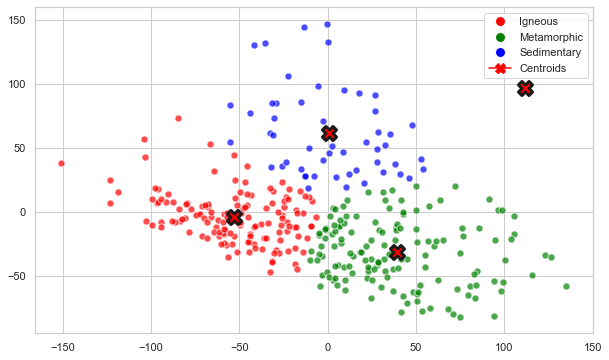

In [ ]:
# Train a KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)
categories = kmeans.labels_
centroids = kmeans.cluster_centers_

# Create a mapping of category to color with full names for the legend
category_colors = {0: 'red', 1: 'green', 2: 'blue'}
category_names = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'}

def plot_clusters(X, categories, centroids):
    plt.figure(figsize=(10, 6))

    for category, color in category_colors.items():
        subset = X[categories == category]
        plt.scatter(subset[:, 0], subset[:, 1], c=color, label=category_names[category], alpha=0.7, edgecolors='w', s=50)

    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='red', edgecolors='k', label='Centroids')
    # Custom Legend
    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Igneous', markersize=10, markerfacecolor='red'),
                        plt.Line2D([0], [0], marker='o', color='w', label='Metamorphic', markersize=10, markerfacecolor='green'),
                        plt.Line2D([0], [0], marker='o', color='w', label='Sedimentary', markersize=10, markerfacecolor='blue'),
                        plt.Line2D([0], [0], marker='X', color='red', label='Centroids', markersize=10)])

    plt.show()

# Plotting the clusters and centroids
plot_clusters(X_pca, categories, centroids)

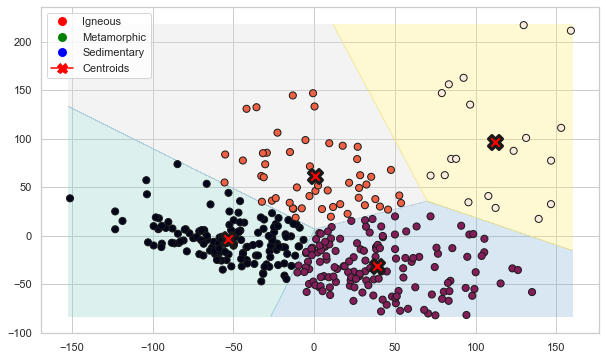

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_clusters_with_boundaries(X, categories, centroids, resolution=1000):
    # Create a mesh grid for decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))

    # Predict cluster index for each point on the grid
    Z = centroids.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.get_cmap('Set3', np.unique(categories).size))

    # Scatter plot of the actual data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=categories, edgecolors='k', s=50)
    plt.scatter(centroids.cluster_centers_[:, 0], centroids.cluster_centers_[:, 1], marker='X', s=200, linewidths=3, color='red', edgecolors='k', label='Centroids')

    # Custom Legend
    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Igneous', markersize=10, markerfacecolor='red'),
                        plt.Line2D([0], [0], marker='o', color='w', label='Metamorphic', markersize=10, markerfacecolor='green'),
                        plt.Line2D([0], [0], marker='o', color='w', label='Sedimentary', markersize=10, markerfacecolor='blue'),
                        plt.Line2D([0], [0], marker='X', color='red', label='Centroids', markersize=10)])
    plt.show()

# Example usage
# Assuming X_pca is your data, and kmeans_final is your KMeans model
kmeans_final = KMeans(n_clusters=4, random_state=42).fit(X_pca)
categories = kmeans_final.labels_
plot_clusters_with_boundaries(X_pca, categories, kmeans_final)

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming kmeans is your KMeans clustering model and X is your data
labels = kmeans_final.labels_
silhouette_avg = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4287619832558143


In [ ]:
import os
import numpy as np
from PIL import Image

def load_images_from_folder(folder):
    images = []
    labels = []

    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            img = Image.open(os.path.join(folder, filename))
            img = img.convert('L')  # Convert to grayscale if needed
            img = img.resize((128, 128))  # Resize to uniform size
            images.append(np.array(img))
            labels.append(filename[0])  # Assuming label is the first character of the filename

    return images, labels

# Load training and validation data
train_data, train_labels = load_images_from_folder('./Rock_Dataset')
val_data, val_labels = load_images_from_folder('./120 Rocks')

# Convert lists to numpy arrays for efficient processing
train_data = np.array(train_data)
val_data = np.array(val_data)

# Normalize pixel values to be between 0 and 1
train_data = train_data / 255.0
val_data = val_data / 255.0

train_data = np.expand_dims(train_data, axis=-1)  # Add a channel dimension
val_data = np.expand_dims(val_data, axis=-1)  # Add a channel dimension


# Convert labels to numeric form if necessary
# For example, if labels are 'I', 'M', 'S', map them to 0, 1, 2 respectively
label_mapping = {'I': 0, 'M': 1, 'S': 2}
train_labels = np.array([label_mapping[label] for label in train_labels])
val_labels = np.array([label_mapping[label] for label in val_labels])

# Now your data is ready to be used for training the model


In [ ]:
# Step 1: Building the Neural Network using TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

def build_model(input_shape):
    """
    Builds a neural network model based on the specified criteria.

    Args:
    input_shape (tuple): The shape of the input images (height, width, channels).

    Returns:
    model (tf.keras.Model): The constructed neural network model.
    """
    model = Sequential()

    # Example architecture - can be adjusted based on the specifics of the task
    # Adding Convolutional Layers for feature extraction (if needed)
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Flatten())

    # Adding Dense Layers for classification
    # Hidden layers with ReLU activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    # The last layer before softmax with 8 neurons
    model.add(Dense(8, activation='relu'))

    # Output layer with softmax activation for classification
    model.add(Dense(3, activation='softmax'))  # Assuming 3 classes (I, M, S)

    return model

# Example input shape (height, width, channels)
input_shape = (128, 128, 1)  # Grayscale images of size 128x128

# Build the model
model = build_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [ ]:
import time

def train_model(model, train_data, train_labels, validation_data, validation_labels, epochs):
    """
    Trains the neural network model and reports the training time.

    Args:
    model (tf.keras.Model): The neural network model to train.
    train_data (numpy.array): The training data.
    train_labels (numpy.array): The labels for the training data.
    validation_data (numpy.array): The validation data.
    validation_labels (numpy.array): The labels for the validation data.
    epochs (int): The number of epochs to train the model.

    Returns:
    history (History): A record of training loss values and metrics values at successive epochs.
    training_time (float): The total time taken for training the model.
    """
    start_time = time.time()

    history = model.fit(
        train_data,
        train_labels,
        epochs=epochs,
        validation_data=(val_data, val_labels)
    )

    end_time = time.time()
    training_time = end_time - start_time

    return history, training_time

# Example usage
# Assuming train_images, train_labels, val_images, val_labels are defined and loaded with the appropriate data
epochs = 10  # Set the number of epochs as per your requirement
history, training_time = train_model(model, train_data, train_labels, val_data, val_labels, epochs)

print(f"Training time: {training_time} seconds")


Epoch 1/10
12/12 [==============================] - 4s 338ms/step - loss: 1.1045 - accuracy: 0.3167 - val_loss: 1.0985 - val_accuracy: 0.3833
Epoch 2/10
12/12 [==============================] - 4s 331ms/step - loss: 1.0979 - accuracy: 0.3417 - val_loss: 1.0924 - val_accuracy: 0.3917
Epoch 3/10
12/12 [==============================] - 4s 333ms/step - loss: 1.0978 - accuracy: 0.3639 - val_loss: 1.0966 - val_accuracy: 0.3667
Epoch 4/10
12/12 [==============================] - 4s 335ms/step - loss: 1.0796 - accuracy: 0.4361 - val_loss: 1.0959 - val_accuracy: 0.3833
Epoch 5/10
12/12 [==============================] - 4s 338ms/step - loss: 1.0657 - accuracy: 0.4333 - val_loss: 1.0477 - val_accuracy: 0.4833
Epoch 6/10
12/12 [==============================] - 4s 338ms/step - loss: 0.9998 - accuracy: 0.5111 - val_loss: 1.1184 - val_accuracy: 0.4333
Epoch 7/10
12/12 [==============================] - 4s 337ms/step - loss: 0.9478 - accuracy: 0.5222 - val_loss: 1.0541 - val_accuracy: 0.4750
Epoch 

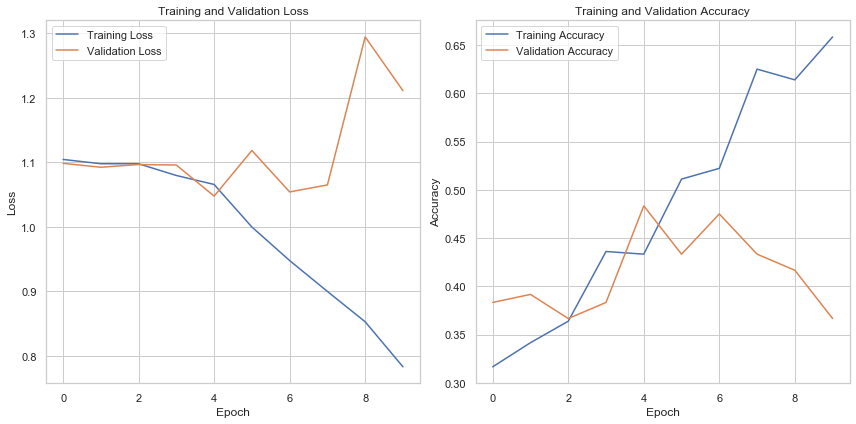

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Calculating the total number of bias parameters:

conv2d_9 (Conv2D): 32 (because of 32 filters)
conv2d_10 (Conv2D): 64 (because of 64 filters)
conv2d_11 (Conv2D): 128 (because of 128 filters)
dense_12 (Dense): 64 (because of 64 neurons)
dense_13 (Dense): 32 (because of 32 neurons)
dense_14 (Dense): 8 (because of 8 neurons)
dense_15 (Dense): 3 (because of 3 neurons)


To summarize:

Total Parameters: 6,517,635
Total Bias Parameters: 331
These calculations are based on the standard structure of Conv2D and Dense layers in neural networks, where each unit (filter/neuron) has an associated bias term

In [ ]:
import numpy as np
from scipy.spatial import procrustes
from tensorflow.keras.models import Model


# Example function to load human data from a text file
def load_human_data(file_path):
    return np.loadtxt(file_path)

# Load human data
human_data_360 = load_human_data('./mds_360.txt')
human_data_120 = load_human_data('./mds_120.txt')

# Function to extract features from the neural network
def extract_features(model, data):
    intermediate_layer_model = Model(inputs=model.input,
                                     outputs=model.get_layer(index=-2).output)
    return intermediate_layer_model.predict(data)

# Extract features from the neural network
nn_features_360 = extract_features(model, train_data)
nn_features_120 = extract_features(model, val_data)

# Perform Procrustes analysis
mtx1_360, mtx2_360, disparity_360 = procrustes(human_data_360, nn_features_360)
mtx1_120, mtx2_120, disparity_120 = procrustes(human_data_120, nn_features_120)

# Calculate correlation coefficients
correlation_coefficients_360 = np.corrcoef(mtx1_360, mtx2_360, rowvar=False)
correlation_coefficients_120 = np.corrcoef(mtx1_120, mtx2_120, rowvar=False)


In [ ]:
import pandas as pd

results = {
    "Dataset": ["360 Rocks", "120 Rocks"],
    "Disparity": [disparity_360, disparity_120]
}

results_df = pd.DataFrame(results)

# Display the table
print(results_df)


     Dataset  Disparity
0  360 Rocks   0.845515
1  120 Rocks   0.883742
